<a href="https://colab.research.google.com/github/mylethidiem/ProgramingTech/blob/main/tools/data_jobs_engineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from collections import Counter

In [ ]:
data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2025-01-24_14-15-26-465_dataengineer_vietnam.csv')

# Inspect the first few rows
print(data.head())

  applicationsCount   applyType  \
0     34 applicants    EXTERNAL   
1     89 applicants    EXTERNAL   
2     57 applicants    EXTERNAL   
3     41 applicants  EASY_APPLY   
4     80 applicants  EASY_APPLY   

                                            applyUrl  benefits    companyId  \
0   https://yes4all.talent.vn/job/data-engineer-7029       NaN   14421732.0   
1  https://app.dover.com/apply/renn-labs/8e80853a...       NaN  100919619.0   
2     https://talent.urbox.vn/job/data-engineer-1191       NaN   14647445.0   
3  https://vn.linkedin.com/jobs/view/data-enginee...       NaN     208401.0   
4  https://vn.linkedin.com/jobs/view/data-enginee...       NaN   74075664.0   

                                  companyName  \
0                                     Yes4All   
1                                   Renn Labs   
2  UrBox - Digital Rewards & Loyalty Solution   
3                                FPT Software   
4                                       Temus   

                   

In [ ]:
skills = [
    'python', 'sql', 'excel ','excel\,', 'r studio', 'power bi', 'powerbi', 'tableau', 'machine learning',
    'deep learning', 'aws', 'azure', 'gcp', 'hadoop', 'spark', 'data visualization',
    'data analytics', 'statistics', 'numpy', 'pandas', 'scikit-learn', 'nlp', 'big data',
    'java', 'scala', 'kafka', 'etl', 'domo', 'gcp', 'amazon web service', 'docker', 'rest api',
    'azkaban', 'luigi', 'airflow', 'google cloud', 'bigquery','pyspark'

    'c', 'c++', 'r', 'llm', 'nlp','langchain', 'java', 'machine learning',
    'vlm', 'luigi', 'large language models', 'ocr', 'optical character recognition',
    'cloud', 'opencv', 'computer vision', 'big data', 'math', 'statistics', 'data science',
    'deep learning', 'cloud applications', 'LLaMA', 'ocr', 'gen ai','generative ai', 'gpt',

    'google analytics', 'data warehouse', 'snowflake', 'brick', 'mysql', 'sql server', 'postgres', 'olap', 'dax', 'power platform', 'power automate', 'database'
]

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to job descriptions
data['clean_description'] = data['description'].apply(preprocess_text)

In [ ]:
def extract_skills(text, skills_list):
    found_skills = [skill for skill in skills_list if skill in text]
    # print(found_skills)
    return found_skills

# Extract skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_skills(x, skills))
print(data['skills'])

0      [python, sql, aws, hadoop, spark, big data, ja...
1      [python, sql, machine learning, aws, azure, ha...
2      [python, sql, aws, etl, airflow, mysql, database]
3      [python, sql, power bi, machine learning, data...
4                               [python, sql, snowflake]
                             ...                        
239    [python, sql, power bi, data analytics, statis...
240                                          [sql, java]
241    [sql, aws, java, scala, kafka, amazon web serv...
242                                                   []
243                [sql, aws, scala, rest api, database]
Name: skills, Length: 244, dtype: object


In [54]:
all_skills = data['skills'].sum()  # Flatten the list of lists
skill_counts = Counter(all_skills)  # Count occurrences

# Convert to a DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

print(skill_df.head(50))  # Display the top 10 skills

                 Skill  Frequency
3               python        146
15                 sql        143
9                scala        107
8                 java         94
14                 aws         91
5             database         87
10               spark         51
1                  etl         49
17               azure         49
18    machine learning         47
33              docker         40
6             postgres         38
24            power bi         36
28                 gcp         35
0             big data         33
13               mysql         33
4                kafka         33
23      data warehouse         32
7              airflow         29
21      data analytics         29
2               hadoop         28
16        google cloud         28
35          statistics         22
19           snowflake         21
25  data visualization         19
26             tableau         16
20            bigquery         15
41              excel          15
31            

# Dedup if one job mention a skill twice or more

In [ ]:
def extract_unique_skills(text, skills_list):
    text = text.replace('powerbi', 'power bi')
    found_skills = {skill for skill in skills_list if skill in text}  # Use a set for unique values
    return list(found_skills)  # Convert back to list if needed

# Extract unique skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))

In [ ]:
data

,applicationsCount,applyType,applyUrl,benefits,companyId,companyName,companyUrl,contractType,description,experienceLevel,...,postedTime,posterFullName,posterProfileUrl,publishedAt,salary,sector,title,workType,clean_description,skills
0,34 applicants,EXTERNAL,https://yes4all.talent.vn/job/data-engineer-7029,NaN,14421732.0,Yes4All,https://vn.linkedin.com/company/yes4all-inc?tr...,Full-time,Yes4All is one of the leading brands for home ...,Entry level,...,2 weeks ago,NaN,NaN,2025-01-07,NaN,Retail,Data Engineer,Information Technology,yes4all is one of the leading brands for home ...,"[big data, etl, hadoop, python, kafka, databas..."
1,89 applicants,EXTERNAL,https://app.dover.com/apply/renn-labs/8e80853a...,NaN,100919619.0,Renn Labs,https://www.linkedin.com/company/renn-labs?trk...,Full-time,"Are you passionate about building robust, scal...",Entry level,...,5 months ago,NaN,NaN,2024-08-21,NaN,Software Development,Data Engineer,Information Technology,are you passionate about building robust scala...,"[google cloud, big data, azure, hadoop, python..."
2,57 applicants,EXTERNAL,https://talent.urbox.vn/job/data-engineer-1191,NaN,14647445.0,UrBox - Digital Rewards & Loyalty Solution,https://vn.linkedin.com/company/urboxvn?trk=pu...,Full-time,Location: Ho Chi Minh\n\nExpired date: 31/12/2...,Entry level,...,1 month ago,NaN,NaN,2024-11-27,NaN,Consumer Services,Data Engineer,Information Technology,location ho chi minh\n\nexpired date 31122024\...,"[etl, python, database, airflow, mysql, aws, sql]"
3,41 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-enginee...,NaN,208401.0,FPT Software,https://vn.linkedin.com/company/fpt-software?t...,Full-time,Position : Data Engineer\n\nLocation: Q9\n\n\n...,Entry level,...,2 weeks ago,Huong Nguyen,https://vn.linkedin.com/in/huong-nguyen-a52287184,2025-01-09,NaN,IT Services and IT Consulting,Data Engineer/Power BI,Information Technology,position data engineer\n\nlocation q9\n\n\n\n...,"[big data, etl, data analytics, python, amazon..."
4,80 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-enginee...,NaN,74075664.0,Temus,https://sg.linkedin.com/company/temus?trk=publ...,Contract,About Us:\n\nTemus is a vision-to-value compan...,Mid-Senior level,...,2 weeks ago,Niki Goh (She/Her),https://sg.linkedin.com/in/nikigoh,2025-01-10,NaN,IT Services and IT Consulting,Data Engineer – SQL & Python (Ho Chi Minh City...,Information Technology,about us\n\ntemus is a visiontovalue company b...,"[python, snowflake, sql]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,37 applicants,EXTERNAL,https://yes4all.talent.vn/job/business-intelli...,NaN,14421732.0,Yes4All,https://vn.linkedin.com/company/yes4all-inc?tr...,Full-time,Yes4All is one of the leading brands for home ...,Mid-Senior level,...,1 week ago,NaN,NaN,2025-01-13,NaN,Retail,Business Intelligence Analyst,"Research, Analyst, and Information Technology",yes4all is one of the leading brands for home ...,"[data analytics, python, power bi, statistics,..."
240,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/senior-softw...,NaN,3128.0,FIS,https://www.linkedin.com/company/fis?trk=publi...,Full-time,Position Type\n\nFull time\n\nType Of Hire\n\n...,Mid-Senior level,...,2 days ago,Coleen Vicente,https://ph.linkedin.com/in/coleen-vicente-1195...,2025-01-22,NaN,IT Services and IT Consulting and Financial Se...,"Senior Software Engineer - (Core Banking, JAVA...",Engineering and Information Technology,position type\n\nfull time\n\ntype of hire\n\n...,"[java, sql]"
241,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/lead-softwar...,NaN,25020478.0,Agnos Inc.,https://www.linkedin.com/company/agnos?trk=pub...,Full-time,About Us\n\nAgnos is a healthcare-focused tech...,Mid-Senior level,...,1 month ago,NaN,NaN,2024-12-10,NaN,Internet Publishing,Lead Software Engineer (RoR Fullstack Engineer...,Engineering and Information Technology,about us\n\nagnos is a he

In [ ]:
# Flatten the list of lists into a single list of skills
all_unique_skills = data['skills'].sum()

# Use Counter to count occurrences of each skill across all descriptions
skill_counts = Counter(all_unique_skills)

# Convert to DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 skills
print(skill_df.head(20))

               Skill  Frequency
3             python        146
15               sql        143
9              scala        107
8               java         94
14               aws         91
5           database         87
10             spark         51
1                etl         49
17             azure         49
18  machine learning         47
33            docker         40
6           postgres         38
24          power bi         36
28               gcp         35
0           big data         33
13             mysql         33
4              kafka         33
23    data warehouse         32
7            airflow         29
21    data analytics         29


# Visualise

In [ ]:
!pip install pillow

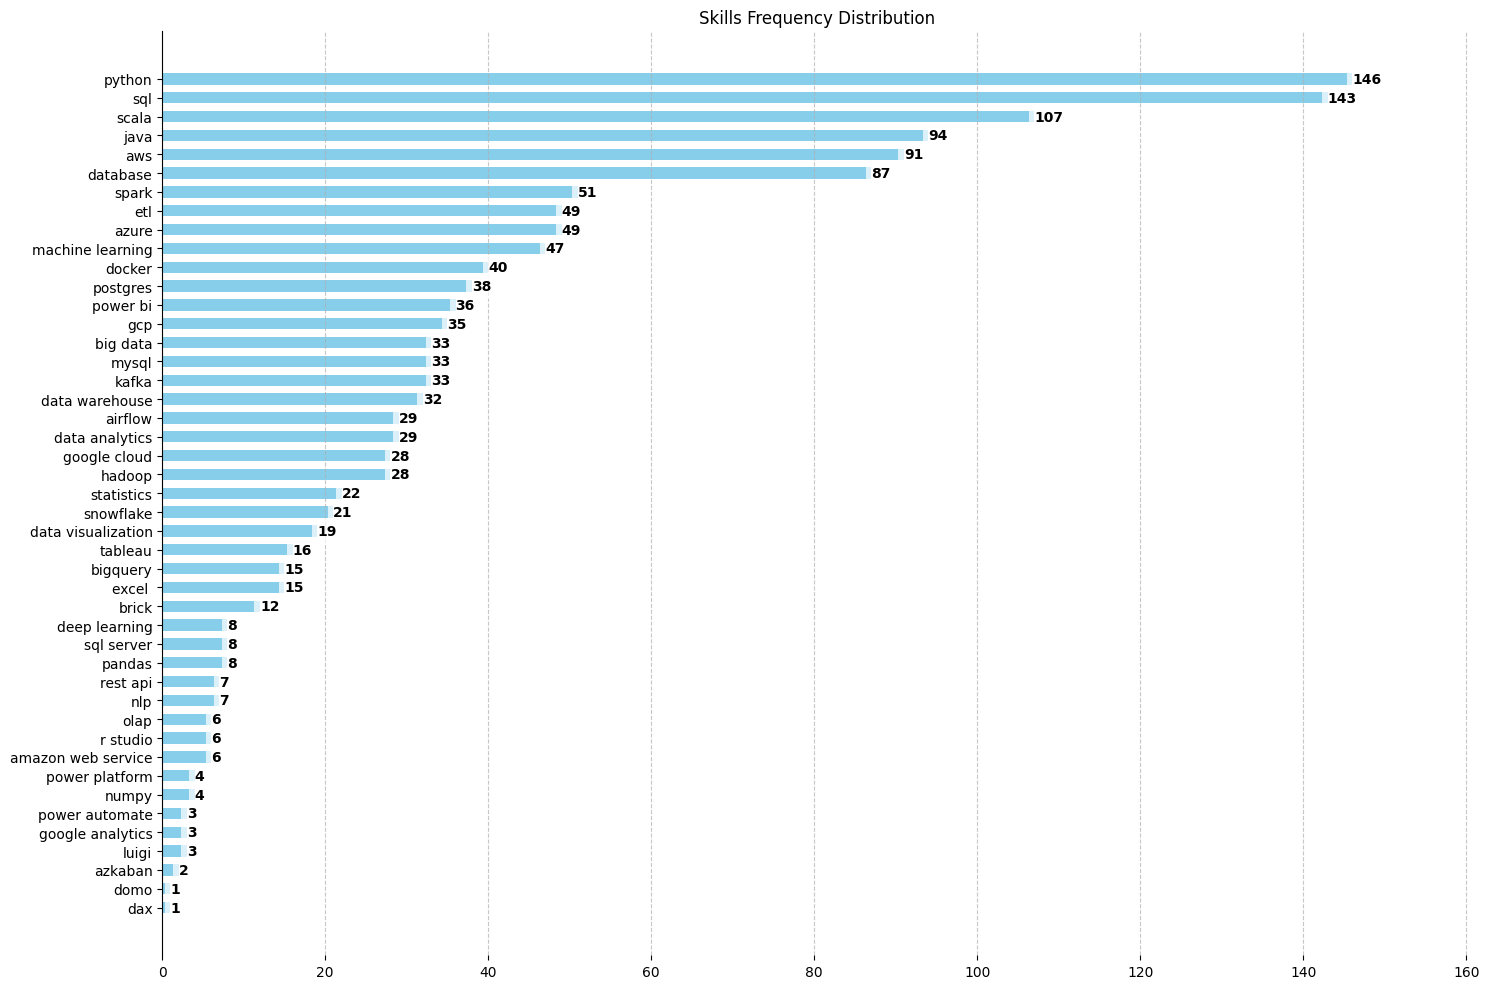

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.patches as patches
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Sample data (replace this with actual counts from your code)
df = skill_df.copy()

def find_logo(skill, logos_folder='logos'):
    """Find a matching logo file for a given skill"""
    # List of common image extensions
    extensions = ['.png', '.jpg', '.jpeg', '.svg', '.gif']

    # Clean skill name (remove spaces, lowercase)
    skill = skill.lower().replace(' ', '')

    # Try to find an exact match
    for ext in extensions:
        filepath = os.path.join(logos_folder, f"{skill}{ext}")
        if os.path.exists(filepath):
            return filepath

    return None

def create_bar_chart_with_logos(df, logos_folder='logos', figsize=(15, 10)):
    # Sort DataFrame by frequency in descending order
    df = df.sort_values('Frequency', ascending=True)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Create horizontal bar chart
    bars = ax.barh(np.arange(len(df)), df['Frequency'], height=0.6, color='skyblue')

    # Customize chart
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['Skill'])
    # ax.set_ylabel('')
    # ax.set_yticks([])  # This removes the x-axis ticks
    ax.spines['top'].set_visible(False)  # Hide top border
    ax.spines['right'].set_visible(False)  # Hide right border
    ax.spines['bottom'].set_visible(False)  # Hide bottom borde
    ax.set_title('Skills Frequency Distribution')

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        #No logo now
        # Try to add logo
        # skill = df.iloc[i]['Skill']
        # logo_path = find_logo(skill, logos_folder)

        # if logo_path:
        #     try:
        #         # Open and read the image
        #         img = Image.open(logo_path)

        #         # Convert to RGBA if not already
        #         if img.mode != 'RGBA':
        #             img = img.convert('RGBA')

        #         # Resize image if it's too large
        #         max_size = 40  # maximum width or height in pixels
        #         ratio = min(max_size/img.size[0], max_size/img.size[1])
        #         new_size = tuple([int(dim * ratio) for dim in img.size])
        #         img = img.resize(new_size, Image.Resampling.LANCZOS)

        #         # Create an ImageBox and add it to the plot
        #         imagebox = OffsetImage(img, zoom=0.5)  # Adjust zoom as needed
        #         ab = AnnotationBbox(imagebox, (0, i),
        #                           xybox=(-30, 0),  # Offset from y-axis
        #                           xycoords=('data', 'data'),
        #                           boxcoords="offset points",
        #                           frameon=False)
        #
        #         ax.add_artist(ab)
        #     except Exception as e:
        #         print(f"Could not load logo for {skill}: {e}")

    # Adjust layout to prevent label cutoff
    plt.margins(x=0.1)
    plt.tight_layout()

    return fig


# Create the visualization
chart = create_bar_chart_with_logos(df)

# Save or display the chart
plt.show()